# Talent Squad

In [29]:
import pandas as pd
from sklearn import metrics, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sb
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [30]:
df_train = pd.read_csv("train.csv")

le = preprocessing.LabelEncoder()

df_train.drop(["Unnamed: 0"], axis=1, inplace=True)

df_train["lunch"] = le.fit_transform(df_train["lunch"])
df_train["gender"] = le.fit_transform(df_train["gender"])
df_train["test preparation course"] = le.fit_transform(df_train["test preparation course"])
df_train["test preparation course"] = df_train["test preparation course"].replace({0:1, 1:0})
df_train["math score"] /= 100
df_train["reading score"] /= 100
df_train["writing score"] /= 100

df_train["wealthy"] = (df_train["lunch"] + df_train["test preparation course"]) / 2
df_train["score"] = (df_train["math score"] + df_train["reading score"] + df_train["writing score"]) / 3

display(df_train.head(10))

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,wealthy,score
0,0,1,1,0,0.62,0.76,0.67,0.5,0.683333
1,1,4,1,0,0.79,0.57,0.58,0.5,0.646667
2,0,2,1,0,0.77,0.86,0.84,0.5,0.823333
3,0,0,0,0,0.45,0.46,0.49,0.0,0.466667
4,1,3,1,1,0.82,0.83,0.85,1.0,0.833333
5,0,3,0,0,0.32,0.41,0.39,0.0,0.373333
6,0,1,0,1,0.53,0.70,0.65,0.5,0.626667
7,1,2,0,0,0.57,0.47,0.42,0.0,0.486667
8,1,0,0,0,0.67,0.65,0.54,0.0,0.620000
9,1,1,1,0,0.74,0.71,0.70,0.5,0.716667


In [31]:
df_test = pd.read_csv("test.csv")

df_test.drop(["Unnamed: 0"], axis=1, inplace=True)

df_test["lunch"] = le.fit_transform(df_test["lunch"])
df_test["gender"] = le.fit_transform(df_test["gender"])
df_test["test preparation course"] = le.fit_transform(df_test["test preparation course"])
df_test["test preparation course"] = df_test["test preparation course"].replace({0:1, 1:0})
df_test["math score"] /= 100
df_test["reading score"] /= 100
df_test["writing score"] /= 100

df_test["wealthy"] = (df_test["lunch"] + df_test["test preparation course"]) / 2
df_test["score"] = (df_test["math score"] + df_test["reading score"] + df_test["writing score"]) / 3

display(df_test.head(5))

,gender,lunch,test preparation course,math score,reading score,writing score,wealthy,score
0,1,1,0,0.54,0.43,0.45,0.5,0.473333
1,0,1,0,0.72,0.77,0.77,0.5,0.753333
2,0,1,0,0.87,0.97,1.00,0.5,0.946667
3,1,1,0,0.55,0.55,0.55,0.5,0.550000
4,1,1,0,0.56,0.54,0.43,0.5,0.510000


C:\Users\danil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


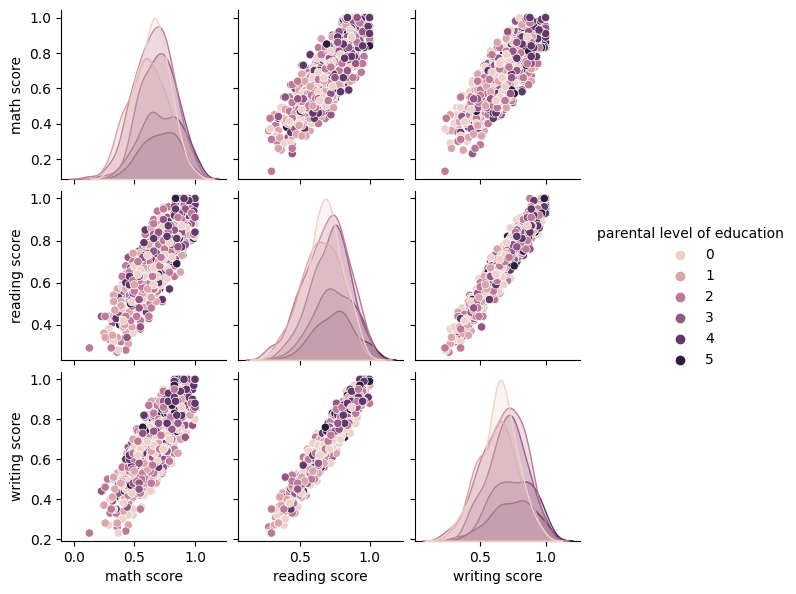

In [32]:
sb.pairplot(df_train.dropna(), hue='parental level of education',size=2,vars=["math score","reading score","writing score"],kind='scatter')

C:\Users\danil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


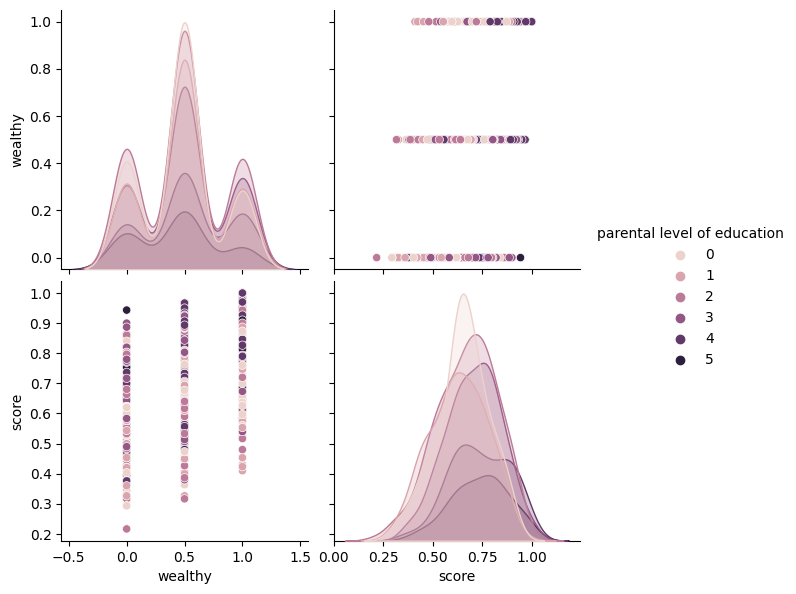

In [33]:
sb.pairplot(df_train.dropna(), hue='parental level of education',size=3,vars=["wealthy", "score"],kind='scatter')

In [34]:
X = df_train.drop("parental level of education", axis=1)
y = df_train.pop("parental level of education")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234, stratify=y)
class_names = ["0", "1", "2", "3", "4", "5"]

In [35]:
def entrena_y_evalua(X_train, X_test, y_train, y_test, sistema):
    if sistema == "KNeighborsClassifier":
        sys = KNeighborsClassifier()
    elif sistema == "GaussianNB":
        sys = GaussianNB()
    elif sistema == "DecisionTreeClassifier":
        sys = DecisionTreeClassifier(random_state=1234)
    elif sistema == "RandomForestClassifier":
        sys = RandomForestClassifier(random_state=1234, n_jobs=-1)
    elif sistema == "SVC":
        sys = SVC(max_iter=100000)
    elif sistema == "LogisticRegression":
        sys = LogisticRegression(max_iter=100000)
    elif sistema == "ovo(rl)":
        sys = OneVsOneClassifier(LogisticRegression(max_iter=100000))
    elif sistema == "ovo(svc)":
        sys = OneVsOneClassifier(SVC(max_iter=1000000))
    elif sistema == "ovr(rl)":
        sys = OneVsRestClassifier(LogisticRegression(max_iter=1000000))
    elif sistema == "ovr(svc)":
        sys = OneVsRestClassifier(SVC(max_iter=1000000))
    else:
        print("Sistema no reconocido")
        exit()

    model = sys.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)

    resultados = metrics.classification_report(
        y_test, y_pred, output_dict=True)

    return [
        resultados["accuracy"],
        resultados["weighted avg"]["precision"],
        resultados["weighted avg"]["recall"],
        resultados["weighted avg"]["f1-score"],
    ]

In [36]:
sistemas = [
    "KNeighborsClassifier",
    "GaussianNB",
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "SVC",
    "LogisticRegression",
    "ovo(rl)",
    "ovo(svc)",
    "ovr(rl)",
    "ovr(svc)"
]

resultados = np.empty((len(sistemas), 4))
i = 0
for sistema in sistemas:
    resultados[i, :] = entrena_y_evalua(
        X_train, X_test, y_train, y_test, sistema)
    i += 1

C:\Users\danil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\danil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334

In [37]:
df_resultados = pd.DataFrame(
    resultados, index=sistemas, columns=[
        "Accuracy", "Precision", "Recall", "F1-score"]
)
print(df_resultados)

                        Accuracy  Precision    Recall  F1-score
KNeighborsClassifier    0.220833   0.214441  0.220833  0.203546
GaussianNB              0.279167   0.284021  0.279167  0.259114
DecisionTreeClassifier  0.179167   0.174952  0.179167  0.176435
RandomForestClassifier  0.183333   0.176993  0.183333  0.179498
SVC                     0.237500   0.185385  0.237500  0.202001
LogisticRegression      0.270833   0.263012  0.270833  0.246633
ovo(rl)                 0.250000   0.280007  0.250000  0.219718
ovo(svc)                0.233333   0.181870  0.233333  0.198865
ovr(rl)                 0.262500   0.327779  0.262500  0.231164
ovr(svc)                0.254167   0.248745  0.254167  0.250172


In [38]:
sys = GaussianNB()

model = sys.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, average='macro')

print("Accuracy: %.4f" % acc)
print("F1-Score: %.4f" % f1)

Accuracy: 0.2792
F1-Score: 0.2508


In [50]:
result = model.predict(df_test)
df_result = pd.DataFrame(result, columns=["target"])
out = df_result.to_json("predictions.json", indent=1)